[Indice](index.ipynb) | Previo: [Problema2Cuerpos.SolucionTiempo.EcuacionKepler](07.04.01.00.Problema2Cuerpos.SolucionTiempo.EcuacionKepler.ipynb) | Siguiente: [Problema2Cuerpos.SolucionTiempo.Sintesis](07.04.02.00.Problema2Cuerpos.SolucionTiempo.Sintesis.ipynb)

### 7.10.5. Solución numérica a la ecuación de Kepler
<a id='solucion_kepler_numerica'></a>

Casi que desde que se formuló la ecuación de Kepler para órbitas elípticas en 1609, decenas, sino cientos de métodos distintos se han inventado para resolver la ecuación con distintos niveles de precisión.  Estos métodos han evolucionado mucho recientemente (especialmente a partir de las últimas décadas de los 1900) obedeciendo, de un lado, a las exigencias de los vuelos espaciales y la astronomía de alta precisión y del otro a la disposición de computadoras que pueden calcular a gran velocidad el valor aproximado de series infinitas o aplicar métodos iterativos, independientemente de su complejidad.  Para una revisión exhaustiva de los distintos métodos y sus propiedades numéricas se invita al lector a revisar el libro de Peter Colwell "*Solving Kepler's equation over three centuries*" <cite data-cite="Colwell1993Kepler"><a href="mybook.html#Colwell1993Kepler">(Colwell, 1993)</a></cite> o en la literatura especializada, la excelente serie de artículos publicados por Danby y Burkardt <cite data-cite="Danby1983KeplerI"><a href="mybook.html#Danby1983KeplerI">(Danby & Burkardt, 1983</a></cite>,<cite data-cite="Danby1983KeplerII"><a href="mybook.html#Danby1983KeplerII">Burkardt & Danby, 1983</a></cite>,<cite data-cite="Danby1983KeplerIII"><a href="mybook.html#Danby1983KeplerIII">Danby, 1987)</a></cite> o el también reconocido trabajo de Odell \& Gooding <cite data-cite="Odell1986Kepler"><a href="mybook.html#Odell1986Kepler">(Odell & Gooding, 1986)</a></cite>.

A continuación hacemos una síntesis de algunos de los métodos ideados en los últimos 300 años para resolver la ecuación de Kepler y describimos algunos algorítmos que serán útiles en lo sucesivo en este libro.  Nos concentraremos específicamente en ilustrar la solución a la ecuación de Kepler en el caso de órbitas elípticas, que son también las de mayor interés en astronomía e ingeniería aeroespacial.  Sin embargo, la mayoría de estos métodos se aplican también para el caso hiperbólico sin muchas modificaciones.

Bajo ninguna circunstancia, esta breve síntesis puede considerarse completa o representativa de la vasta literatura en el tema.  Este resumen, tiene el único propósito de poner al tanto al lector de algunos los retos y de los logros matemáticos que se han conseguido en esta materia durante el par de siglos que nos separan desde los trabajos pioneros de Kepler.

#### 7.10.5.1. El Método de Kepler
<a id='kepler_metodo_kepler'></a>

El primer método ideado para resolver la Ec. ([ecuacion_kepler](#mjx-eqn-eq%3Aecuacion_kepler)) fue presentado precisamente por el mismo Kepler en su libro "Epítome de la astronomía Copernicana* publicado entre 1617 y 1621[$^1$](11.00.00.00.ApendiceAlgoritmos.ipynb#notaspie_1)

Para ilustrar el método original de Kepler, supongamos que queremos encontrar el valor de la anomalía excéntrica para los siguientes valores de $e$ y $M$:

In [3]:
e=0.5
M=37 #grados

El método consiste en elegir un valor para la anomalía excéntrica $E_0$, que sirva como punto de partida.  Escojamos por ejemplo el siguiente valor para esta cantidad:

In [4]:
E0=45 

El siguiente paso consiste en calcular el valor de la anomalía media $M_0$ correspondiente a $E_0$ de acuerdo con la ecuación de Kepler:

$$M_0=E_0-e\sin E_0$$  

Para usar las funciones trigonométricas tenermos que convertir primero los valores de `M` y `E0` a radianes:

In [5]:
from numpy import pi
M=M*pi/180
E0=E0*pi/180

from numpy import sin
M0=E0-e*sin(E0)

In [6]:
print(f"M0 = {M0*180/pi} grados")

M0 = 24.742882886465114 grados


Como vemos, $M_0$ no coincide con el valor original de $M$. Sin embargo podemos usar la diferencia $\epsilon_0=M-M_0$ para calcular un valor corregido de la anomalía excéntrica, $E_1=E_0+\epsilon_0$:

In [7]:
epsilon0=M-M0
E1=E0+epsilon0

In [8]:
print(f"epsilon0 = {epsilon0*180/pi}")
print(f"E1 = {E1*180/pi} grados")

epsilon0 = 12.257117113534887
E1 = 57.25711711353489 grados


Si repetimos el procedimiento anterior podemos encontrar un tercer valor para $E$:

In [9]:
M1=E1-e*sin(E1)
epsilon1=M-M1
E2=E1+epsilon1

In [10]:
print(f"M1 = {M1*180/pi}")
print(f"epsilon1 = {epsilon1*180/pi}")
print(f"E2 = {E2*180/pi}")

M1 = 33.16119928670333
epsilon1 = 3.8388007132966724
E2 = 61.09591782683156


Vemos que en esta segunda iteración, el valor de $M_1$ es más cercano al valor real de $M$, lo que muestra que el procedimiento esta *convergiendo*.  Si repetimos la misma *regla de iteración* otras 5 veces obtenemos la siguiente secuencia de valores de $M$, $\epsilon$ y $E$:

In [11]:
En=E2
for i in range(5):
    Mn=En-e*sin(En)
    en=M-Mn
    En=En+en
    print(f"Paso {i+3}: M{i+2} = {Mn*180/pi:.2f} gr., epsilon{i+2} = {en*180/pi:.3f} gr., E{i+3} = {En*180/pi:.5f} gr.")

Paso 3: M2 = 36.02 gr., epsilon2 = 0.983 gr., E3 = 62.07922 gr.
Paso 4: M3 = 36.77 gr., epsilon3 = 0.234 gr., E4 = 62.31316 gr.
Paso 5: M4 = 36.95 gr., epsilon4 = 0.055 gr., E5 = 62.36772 gr.
Paso 6: M5 = 36.99 gr., epsilon5 = 0.013 gr., E6 = 62.38038 gr.
Paso 7: M6 = 37.00 gr., epsilon6 = 0.003 gr., E7 = 62.38332 gr.


Notamos que el valor de $\epsilon$ se hace cada vez más pequeño y el valor de la anomalía excéntrica se estabiliza con lo que podemos asegurar que el valor real de esta cantidad esta cerca del último valor de $E$ presentado en la lista de arriba.  El *margen de error* de nuestra estimación se puede cifrar cercano a $\epsilon$.

En términos simbólicos la regla de iteración del método de Kepler se puede escribir como:

\begin{equation}
\label{eq:kepler_kepler}
\begin{array}{rcl}
M_{n} & = & E_{n}-e\sin E_{n}\\
\epsilon_{n} & = & M-M_{n}\\
E_{n+1} & = & E_{n}+\epsilon_{n}
\end{array}
\end{equation}
con $n=0,1,2\ldots$.

El *criterio de convergencia*, es decir la condición que nos permite decir cuándo estamos satisfechos con el último valor de la anomalía excéntrica provisto por la regla, puede definirse con la condición:

$$
\Delta_n\equiv\left|\frac{\epsilon_n}{M}\right|<\delta
$$
donde $\Delta_n$ es una estimación del *error relativo* del algoritmo en el paso $n$ y $\delta$ es un número arbitrariamente pequeño escogido por el usuario.  Llamamos a $\delta$ la *tolerancia solicitada*.

Como regla general, puede ser interesante tomar, en lugar del último valor de la anomalía excéntrica provisto por el método iterativo, es decir $E_{n+1}$, el valor promedio entre los dos últimos *pasos*:

$$
\bar{E}=\frac{E_n+E_{n+1}}{2}
$$

Finalmente el valor verdadero de la anomalía excéntrica estará contenido con alta probabilidad en el intervalo:

$$
E\in[\bar{E}-2\Delta_n\bar E,\bar{E}+2\Delta_n\bar E]
$$
que se puede escribir como:

$$
E=\bar{E}\pm \Delta_n\bar E
$$

El método de Kepler se puede implementar con la siguiente rutina:

<a id='code:kepler_kepler'></a>

In [12]:
def kepler_kepler(M,e,E0=1.0,delta=1e-5):
    #Valor inicial de la anomalía excéntrica
    E=E0
    #Valor inicial del error relativo
    Dn=1
    #Contador de iteraciones
    ni=0
    while Dn>delta:
        #"En" es igual al último valor de E
        En=E
        #Regla de iteración
        from math import sin
        Mn=En-e*sin(En)
        en=M-Mn
        E=En+en
        #Valor promedio
        Emed=(E+En)/2
        #Error relativo
        Dn=abs(en/M)
        #Conteo de iteraciones
        ni+=1
    return Emed,Dn,ni

Que se invoca como:

In [13]:
E,error,ni=kepler_kepler(M,e,E0,1e-8)

In [14]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*M*180/pi:.1e} grados")
print(f"Intervalo = [{(E-2*error*M)*180/pi},{(E+2*error*M)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420178431245
Error absoluto = 1.1e-07 grados
Intervalo = [62.38420157333525,62.384201995289665] grados
Número de iteraciones: 14


#### 7.10.5.2. Método del punto fijo
<a id='kepler_metodo_puntofijo'></a>

Otro método muy común y sencillo de entender e implementar es el método del punto fijo.  Este método parte de reescribir la ecuación de Kepler como:

$$
E=M+e\sin E
$$

Escrita de esta manera la solución a la ecuación de Kepler es equivalente a la búsqueda del punto de intersección entre la recta $E$ y la curva $M-e\sin E$.

La regla de iteración del método del punto fijo es:

\begin{equation}
\label{eq:kepler_puntofijo}
\begin{array}{rcl}
E_{n+1} & = & M+e\sin E_n\\
\epsilon_n & = & E_{n+1}-E_n\\
\end{array}
\end{equation}
con un criterio de convergencia:

$$
\left|\frac{\epsilon_n}{\bar{E}}\right|<\delta
$$

Es fácil mostrar que las ecuaciones de iteración del método original de Kepler (Ecs. [kepler_kepler](#mjx-eqn-eq%3Akepler_kepler)) son equivalentes a las del método del punto fijo (ver problemas al final del capítulo.)

#### 7.10.5.3. Método de Newton-Raphson
<a id='kepler_metodo_newton'></a>

Los métodos más rápidos que se han diseñado en la historia para resolver numéricamente la ecuación de Kepler son variaciones de un método cuya autoría original se atribuye a Newton.  En 1669 en su ensayo "Sobre el análisis por series infinitas" (que además se considera el primer texto de cálculo infinitesimal de la historia) Newton presentó una versión particular del método aplicado exclusivamente al caso de funciones polinómicas. El método fue generalizado para funciones no polinómicas en 1690 por Joseph Raphson, razón por la cuál recibe hoy el nombre de **método de Newton-Raphson**.

El método permite encontrar las raices de ecuaciones del tipo:

$$
f(x)=0
$$
donde $f(E)$ es una ecuación diferenciable al menos una vez.  Claramente la **función generalizada de Kepler**, que introdujimos en la [Sección *Función de Kepler*](07.04.01.00.Problema2Cuerpos.SolucionTiempo.EcuacionKepler.ipynb#funcion_kepler) (Ec. [kepler_generalizada](#mjx-eqn-eq%3Akepler_generalizada)), satisface esta condición.

La raiz de la ecuación se obtiene usando la regla de iteración:

$$
x_{n+1} = x_n-\frac{f(x_n)}{f'(x_n)}\\
$$
con $f'(x)=\mathrm{d}f/\mathrm{d}x$.

Si usamos la forma explícita de la función generalizada de Kepler y de su primera derivada (Ec. \label{eq:kepler_generalizada_derivada1}) la regla de iteración del método de Newton-Raphson aplicado al problema de Kepler queda:

$$
G_{n+1} = \frac{M/\sigma+e\;\mathrm{s}G_n-e G_n\;\mathrm{c}G_n}{1-e\;\mathrm{c}G_n}
$$

Esta regla se puede implementar con la siguiente rutina:

<a id='code:kepler_newton'></a>

In [16]:
def kepler_newton(M,e,G0=1,delta=1e-5):
    #Valor inicial de la anomalía excéntrica
    Gn=G0
    #Valor inicial del error relativo
    Dn=1
    #Contador de iteraciones
    ni=0
    while Dn>delta:
        #Inicializa el valor de En
        G=Gn
        #Función de Kepler y de su primera derivada en G
        from pymcel.export import funcion_kepler
        k,kp,kpp=funcion_kepler(G,M,e)
        #Nuevo valor (regla de iteración)
        Gn=G-k/kp
        #Valor medio
        Gmed=(G+Gn)/2
        #Criterio de convergencia
        en=Gn-G
        Dn=abs(en/Gmed)
        ni+=1
    return Gmed,Dn,ni

Al aplicarlo al ejemplo anterior queda:

In [17]:
E,error,ni=kepler_newton(M,e,E0,1e-8)

In [18]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420186888202
Error absoluto = 0.0e+00 grados
Intervalo = [62.38420186888202,62.38420186888202] grados
Número de iteraciones: 5


Que como se ve, converge muchísimo más rápido que el método de punto fijo.

Una rutina general que aplica el método de Newton de forma análoga a como lo hemos hecho en la rutina `kepler_newton`, pero para encontrar la raíz de cualquier función es provisto en el [Apéndice *Algoritmos y rutinas útiles*](11.00.00.00.ApendiceAlgoritmos.ipynb#algoritmos_utiles).  Esta rutina será utilizada en el libro con alguna frecuencia.  Un ejemplo de su uso para el caso ilustrado aquí se muestra a continuación:

In [20]:
from pymcel.export import funcion_kepler,metodo_newton
E,error,ni=metodo_newton(funcion_kepler,x0=E0,delta=1e-8,args=(M,e))

In [21]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420186888202
Error absoluto = 0.0e+00 grados
Intervalo = [62.38420186888202,62.38420186888202] grados
Número de iteraciones: 5


#### 7.10.5.4. El método de Laguerre-Conway
<a id='kepler_laguerre'></a>

Décadas de experimentación numérica han mostrado que el método de Newton, si bien simple y poderoso, puede no converger con la precisión y velocidad apropiadas para ciertos pares de valores de $M$ y $e$.  Un método con convergencia rápida y asegurada es el método de Laguerre-Conway <cite data-cite="Conway1986"><a href="mybook.html#Conway1986">(Conway, 1986)</a></cite> que usa la siguiente regla de iteración:

\begin{eqnarray}
\epsilon_n & = & \frac{\eta f(x)}{f'(x_n)\pm\sqrt{(\eta-1)^2(f'(x_n))^2-\eta(\eta-1)f(x_n)f''(x_n)}} \\
E_{n+1} & = & E_n-\epsilon_n
\end{eqnarray}
donde $\eta$ es un parámetro entero.  Cuando $\eta=1$ el método de Laguerre-Conway es equivalente al método de Newton.  

Experimentos numéricos han mostrado que el valor óptimo de $\eta$ en el caso de la ecuación de Kepler es $\eta=5$. 

En el [Apéndice *Algoritmos y rutinas útiles*](11.00.00.00.ApendiceAlgoritmos.ipynb#algoritmos_utiles) el lector puede encontrar una rutina general que aplica el método de Laguerre-Conway para encontrar la raíz de cualquier ecuación.  Un ejemplo de su uso para la ecuación de Kepler se muestra a continuación:

In [24]:
from pymcel.export import funcion_kepler,metodo_laguerre
E,error,ni=metodo_laguerre(funcion_kepler,x0=E0,delta=1e-8,args=(M,e))

In [25]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420186756679
Error absoluto = 2.6e-09 grados
Intervalo = [62.38420186493632,62.384201870197266] grados
Número de iteraciones: 3


Nótese que el número de iteraciones es mucho menor que en el caso del método de Newton.

#### 7.10.5.5. Métodos de horquillado
<a id='kepler_horquillado'></a>

En los métodos de Kepler, Newton-Raphson y Laguerre-Conway visto en las secciones anteriores, es necesario proveerun primer valor inicial de la anomalía excéntrica (la variable `E0` en los algoritmos presentados hasta aquí.)  Determinar el valor óptimo de `E0` ha probado ser una tarea poco trivial.  Existen métodos alternativos, que aunque mucho menos eficientes, solo requieren conocer a priori un intervalo en el que se encuentre la solución.  En el análisis numérico a estos métodos se los llama en general *bracketing methods* o "métodos de horquillado."  En el paquete `optimize` de la biblioteca `SciPy` podrán encontrar un conjunto de rutinas generales que implementan métodos de horquillado para encontrar la raiz de funciones trascendentales. 

Para encontrar un intervalo de horquillado general, en el caso del movimiento elíptico, comencemos con la ecuación de Kepler escrita de la forma (Ec. [ecuacion_kepler](#mjx-eqn-eq%3Aecuacion_kepler)):

$$
e\sin E-E=-M
$$

Como sabemos que $-1\leq\sin E\leq 1$, el término del lado izquierdo de la ecuación estará acotado por $-e-E\leq e\sin E-E\leq e-E$.  De allí, la ecuación de Kepler se puede escribir en forma de desigualdad:

$$
-e-E\leq -M\leq e-E
$$
trasponiendo algunos términos encontramos que:

$$
M-e\leq E\leq M+e
$$
que es el intervalo de horquillado deseado.

Para el caso hiperbólico la ecuación de Kepler tiene la forma (Ec. [ecuacion_kepler_hiperbolica](#mjx-eqn-eq%3Aecuacion_kepler_hiperbolica)):

$$
e\sinh F-F=M
$$

Usando la respresentación en series de Taylor de la función seno hiperbólico:

$$
\sinh F=F+\frac{F^3}{3!}+\frac{F^5}{5!}+\ldots
$$ 
vemos que $\sinh F$ esta acotada por debajo por: 

$$\sinh F\geq F$$

Sin embargo la función no tienen ninguna cota superior.  Con esto, la ecuación de Kepler hiperbólica se puede escribir en forma de desigualdad como:

$$
M\geq (e-1)F
$$
de donde obtenemos el límite superior de nuestro intervalo de horquillado:

$$
F\leq\frac{M}{e-1}
$$

Ahora bien, sabemos que el mínimo valor de la anomalía excéntrica es $F=0$ cuando $M=0$.  Para todos los valores positivos de $M$, $F\geq 0$.  Con esto podemos finalmente escribir un intervalo de horquillado completo para el caso hiperbólico como:

$$
0\leq F\leq \frac{M}{e-1}
$$

En el algoritmo abajo se ilustra el uso de algunas de los métodos de horquillado implementados en `SciPy.optimize` para resolver la ecuación de Kepler en el ejemplo desarrollado en esta sección:

In [26]:
from numpy import pi
from scipy import optimize

#Recuerde que funcion_kepler devuelve también las derivadas
from pymcel.export import funcion_kepler
kepler=lambda G,M,e:funcion_kepler(G,M,e)[0]

#Método de bisección
E_bis,info_bis=optimize.bisect(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_bis=info_bis.iterations

#Método de Brent
E_bre,info_bre=optimize.brentq(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_bre=info_bre.iterations

#Método de Ridder
E_rid,info_rid=optimize.ridder(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_rid=info_rid.iterations

In [27]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"Bisección:",
      f"E = {E_bis*180/pi:.17f}",
      f"iteraciones = {ni_bis}")
print(f"Brent:",
      f"E = {E_bre*180/pi:.17f}",
      f"iteraciones = {ni_bre}")
print(f"Ridder:",
      f"E = {E_rid*180/pi:.17f}",
      f"iteraciones = {ni_rid}")

M = 37, e = 0.50
Bisección: E = 62.38420210930057408 iteraciones = 27
Brent: E = 62.38420186878084195 iteraciones = 6
Ridder: E = 62.38420218086032065 iteraciones = 4


#### 7.10.5.6. Otros métodos
<a id='kepler_otros_metodos'></a>

Otro esfuerzo notable realizado especialmente en las últimas décadas <cite data-cite="Nijenhuis1991Kepler"><a href="mybook.html#Nijenhuis1991Kepler">(Nijenhuis, 1991)</a></cite>, <cite data-cite="Fukushima1991Kepler"><a href="mybook.html#Fukushima1991Kepler">(Fukushima, 1991)</a></cite> ha sido el de desarrollar rutinas que resuelven la ecuación de Kepler ejecutando el mínimo número de funciones analíticas (p.e. funciones trigonométricas) o usando únicamente operaciones básicas (multiplicaciones, sumas, divisiones).  

En el [Apéndice *Algoritmos y rutinas útiles*](11.00.00.00.ApendiceAlgoritmos.ipynb#algoritmos_utiles) hemos incluido algunas rutinas que se encuentran en la literatura y que usan esta aproximación.

Un ejemplo de ellas es la rutina `kepler_semianalitico` <cite data-cite="Nijenhuis1991Kepler"><a href="mybook.html#Nijenhuis1991Kepler">(Nijenhuis, 1991)</a></cite>.  Esta rutina cálcula el valor aproximado de la anomalía excéntrica $E$ usando un solo llamado de las funciones seno y coseno.  En comparación la rutina `kepler_newton` (Alg. [kepler_newton](#code:kepler_newton)) en cada iteración usa 3 llamados a las funciones trigonométricas, de modo que cuando, por ejemplo se quiere obtener un valor de $E$ con una precisión muy alta y el número de iteraciones es también alto, gran parte del tiempo de computo se ha invertido en calcular decenas de funciones trigonométricas.

Un ejemplo del uso de la rutina se muestra a continuación:

In [28]:
from pymcel.export import kepler_semianalitico
E,error,ni=kepler_semianalitico(M,e)

In [29]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38761309530199
Error absoluto = 4.4e-03 grados
Intervalo = [62.38319428043351,62.392031910170466] grados
Número de iteraciones: 1


A diferencia de los métodos iterativos vistos antes, la rutina `kepler_semianalitico` no permite calcular el valor de $E$ con una precisión arbitraria.  Por el contrario, para cada valor de $e$ y $M$ existe un único valor devuelto por la rutina y que difiere del valor real en una cantidad que no puede predecirse con anticipación.  Aún así la rutina es suficientemente buena al menos para situaciones en las que no se requiere una excesiva precisión, tal y como se evidencia en la Figura ([code:precision_seminalitica](#fig:code:precision_seminalitica)).  Como vemos allí el error relativo $\Delta_n=|E-\bar E|/E$ oscila entre $\sim 0.01$ (para valores de la excentricidad $e>0.2$) y $\sim 10^{-12}$ (para bajas excentricidades y algunos valores específicos de $M$.

In [30]:
%matplotlib nbagg

<a id='code:precision_seminalitica'></a>

<IPython.core.display.Javascript object>


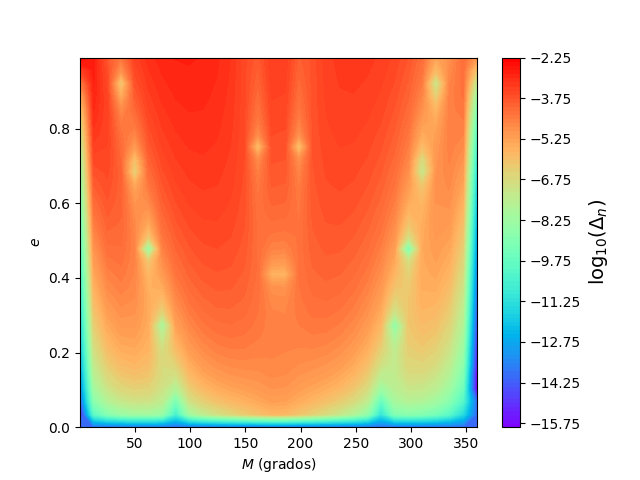

In [31]:
from numpy import linspace,pi,zeros,log10

#Valores de e y M
Ne=30
es=linspace(0,0.99,Ne)
NM=30
Ms=linspace(0.01,2*pi-0.01,NM)

#Construye la matriz de errores
log_errores=zeros((Ne,NM))
for i,ex in enumerate(es):
    for j,Mx in enumerate(Ms):
        E,error,ni=kepler_semianalitico(Mx,ex)
        log_errores[i,j]=log10(error) if error>0 else -14
        
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Gráfico de contorno
contorno=plt.contourf(Ms*180/pi,es,log_errores,
                      cmap="rainbow",levels=100)
color=plt.colorbar(contorno)
color.set_label("$\log_{10}(\Delta_n)$",fontsize=14)

#Decoración
ax.set_xlabel("$M$ (grados)");
ax.set_ylabel("$e$");



<a id='code:precision_seminalitica--hide_input--hide_autocaption'></a><center><b>Figura 7.91.</b> Errores de la rutina semianalítica, es decir, aquella que resuelve la ecuación de Kepler sin usar iteraciones y solo hace un llamado a las funciones trigonométricas.</center>

Podemos usar `kepler_semianalitico` (pero también cualquiera de las rutinas vistas hasta aquí) para visualizar cómo varía la anomalía excéntrica como función de la anomalía media, para distintos valores de la excentridad.  Para ello, en la Figura ([code:E_vs_M](#fig:code:E_vs_M)) hemos graficado el valor de la función $g(M)=E(M)-M$.

<a id='code:E_vs_M'></a>

<IPython.core.display.Javascript object>


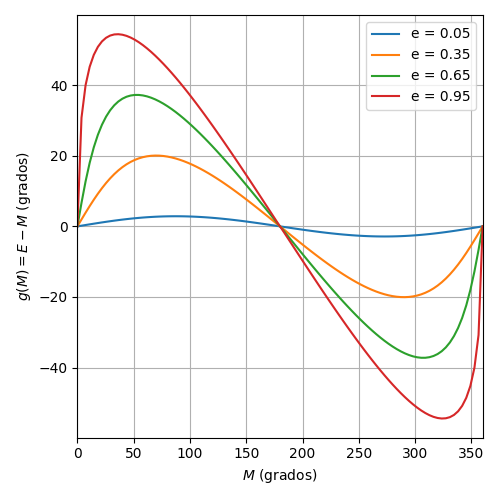

In [32]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()

from numpy import array,linspace,pi
es=linspace(0.05,0.95,4)
Ms=linspace(0,2*pi,100)

for ex in es:
    #Valores de la anomalía excéntrica
    Es=[kepler_semianalitico(Mx,ex)[0] for Mx in Ms]
    ax.plot(array(Ms)*180/pi,array(Es)*180/pi-array(Ms)*180/pi,label=f"e = {ex:.2f}");
    
#Decoración
ax.legend();
ax.set_xlim((0,360))

ax.set_xlabel("$M$ (grados)")
ax.set_ylabel("$g(M)=E-M$ (grados)")
ax.grid()
fig.tight_layout()



<a id='code:E_vs_M--hide_input--hide_autocaption'></a><center><b>Figura 7.92.</b> Anomalía excéntrica como función de la anomalía verdadera para distintos valores de la excentricidad.</center>

De allí podemos comprobar varias propiedades que convendrá mantener presentes en la solución de problemas prácticos en mecánica celeste:

- El valor de $E$ coincide con el de $M$ cuando $M=0,\pi,2\pi$.  En términos de $g(M)$, esto implica que $g(0)=g(\pi)=g(2\pi)=0$.  Llamamos a estos valores los *puntos nodales* de $g$.

- La funcion $g(M)$ es periódica en el intervalo $[0,2\pi)$ y antisimétrica alrededor de $M=\pi$.  Esto implica que para encontrar la solución a la ecuación de Kepler para cualquier valor de $M$, basta encontrar el valor correspondiente en el intervalo $[0,\pi]$ y aplicar las reglas de antisimetría correspondientes.  En términos matemáticos, para cualquier valor de $M>\pi$:

  $$
  g(M)=-g(2\pi-M)
  $$

- Para valores pequeños de $e$, el valor de $E\approx M$.

- La máximas diferencias entre $E$ y $M$, para valores de $e\approx 1$, se producen cuando $M\approx 35^\circ$ y $E\approx 90^\circ$. 

### 7.10.6. Solución analítica por aproximaciones sucesivas
<a id='solucion_kepler_aproximacions'></a>

La solución numérica a la ecuación de Kepler es una estrategia adecuada cuando se trata de resolver problemas prácticos (predecir la posición de un asteroide, calcular efemérides de los planetas, etc.)  Sin embargo en situaciones teóricas más generales, en las que la solución a la ecuación es parte de algún desarrollo matemático, es poco lo que algoritmos iterativos nos pueden enseñar.

Para subsanar esta limitación, casi desde el tiempo de Newton se han encontrado soluciones a la ecuación expresadas como sumas parciales o series infinitas (ver [Sección *Series infinitas*](04.01.05.00.Fundamentos.Calculo.Series.ipynb#series_infinitas)), que en el caso de valores pequeños de la excentricidad proveen expresiones algebraicas aproximadas para la anomalía excéntrica (y otras cantides de interés.)

Una de las más conocidas representaciones en series de la anomalía excéntrica, puede obtenerse aplicando sucesivamente el método del punto fijo (Ec. [kepler_punto_fijo](#mjx-eqn-eq%3Akepler_punto_fijo)):

\begin{equation}
\label{eq:E_iteracion}
E_{n+1}=M+e\sin E_{n}
\end{equation}

Si hacemos $E_0 = M$ y calculamos analíticamente el valor de las primeras dos aproximaciones obtenemos:

\begin{eqnarray}
\label{eq:E_e1}
E_1 & = & M+e\sin M \\
\nonumber
E_2 & = & M+e\sin (M+e\sin M)
\end{eqnarray}

Aplicando las identidades de suma de ángulos en la última expresión, podemos escribir:

\begin{equation}
\label{eq:E2}
\begin{array}{rcl}
E_2 & = & M+e\sin (M+e\sin M) \\
    & = & M + e[\sin M \cos (e\sin M) + \sin (e\sin M)\cos M]
\end{array}
\end{equation}

Las funciones trigonométricas en esta ecuación que tienen como argumento la cantidad $e\sin M<1$, pueden aproximarse usando las series de Taylor de $\cos$ y $\sin$ (Ecs. [sin_taylor](#mjx-eqn-eq%3Asin_taylor) y [cos_taylor](#mjx-eqn-eq%3Acos_taylor)):

\begin{eqnarray}
\label{eq:cos_taylor}
\cos t & = & 1-\frac{t^2}{2!} + \frac{t^4}{4!} +\ldots\\
\label{eq:sin_taylor}
\sin t & = & t-\frac{t^3}{3!} + \frac{t^5}{5!} +\ldots
\end{eqnarray}

Usando estas representaciones de las funciones trigonométricas y truncando los términos proporcionales a  $e^3$ o potencias superiores de $e$, el valor de $E_2$ en la Ec. ([E2](#mjx-eqn-eq%3AE2)) se puede escribir como:

\begin{equation}
\label{eq:E_e2}
E_2 \approx M + e\sin M + \frac{1}{2}e^2 \sin 2M
\end{equation}

El subíndice 2 en esta expresión entonces ya no solo representa el hecho de que se trata de la segunda iteración en el método de punto fijo, sino también de que esta expresión puede darnos el valor aproximado de la excentricidad con un error proporcional a $e^3$.  Es decir, si la escentricidad es suficientemente pequeña $e\ll 1$ la Ec. ([E_e2](#mjx-eqn-eq%3AE_e2)) ofrecerá una aproximación bastante buena para la anomalía excéntrica.

Si continuamos el proceso con una nueva iteración de la Ec. ([E_iteracion](#mjx-eqn-eq%3AE_iteracion)), pero usamos la expresión aproximada de $E_2$ obtenida en la Ec. ([E_e2](#mjx-eqn-eq%3AE_e2)) obtenemos:

$$
E_3 = M + e\sin \left(M + e\sin M + \frac{1}{2}e^2 \sin 2M \right)
$$

Aplicando nuevamente la identidades del seno de suma de ángulos y expandiendo las funciones trigonométricas compuestas hasta términos de orden $e^3$ (truncando todos los términos de orden $e^4$ y superiores) obtenemos una nueva aproximación:

\begin{equation}
\label{eq:E_e3}
E_3 \approx M + \left(e - \frac{1}{8}e^3 \right)\sin M + \frac{1}{2}e^2\sin 2M + \frac{3}{8}e^3\sin 3M
\end{equation}

La siguiente rutina permite calcular las aproximaciones provistas aquí:

<a id='code:kepler_aproximacion'></a>

In [33]:
def kepler_aproximacion(M,e,orden=1):
    from math import sin
    
    #Formula de acuerdo al orden de aproximacion
    if orden==1:
        E=M+e*sin(M)
    elif orden==2:
        E=M+e*sin(M)+0.5*e**2*sin(2*M)
    elif orden==3:
        E=M+(e-1./8*e**3)*sin(M)+0.5*e**2*sin(2*M)+3./8*e**3*sin(3*M)
        
    #Estimación el error relativo
    Ma=E-e*sin(E)
    Dn=abs(Ma-M)/M
    
    return E,Dn,1

Un ejemplo de uso de la rutina se muestra en este algoritmo:

In [34]:
E1,error1,ni1=kepler_aproximacion(M,e,orden=1)
E2,error2,ni1=kepler_aproximacion(M,e,orden=2)
E3,error3,ni1=kepler_aproximacion(M,e,orden=3)

In [35]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E (orden e) = {E1*180/pi:.7f} (error {error1*M*180/pi})")
print(f"E (orden e^2) = {E2*180/pi:.7f} (error {error2*M*180/pi})")
print(f"E (orden e^3) = {E3*180/pi:.7f} (error {error3*M*180/pi})")

M = 37, e = 0.50
E (orden e) = 54.2407304 (error 6.006443353743711)
E (orden e^2) = 61.1252602 (error 0.9610525147400825)
E (orden e^3) = 63.0938414 (error 0.5471173899178785)


En el [Apéndice *Algoritmos y rutinas útiles*](11.00.00.00.ApendiceAlgoritmos.ipynb#algoritmos_utiles) hemos incluído una rutina, `kepler_eserie`, que permite calcular la anomalía excéntrica usando términos hasta un orden arbitrario $e^n$.  Un ejemplo del uso de la rutina se presenta a continuación 

In [36]:
from pymcel.export import kepler_eserie
E8,error8,ni1=kepler_eserie(M,e,orden=8)

In [37]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E (orden e^8) = {E8*180/pi:.7f} (error {error8*M*180/pi})")

M = 37, e = 0.50
E (orden e^8) = 62.3103928 (error 0.003867448222173536)


Esta rutina puede usarse de la misma manera que hemos usado otras anteriormente, proveyendo el valor de la tolerancia con la que se quiere encontrar la anomalía excéntrica:

In [38]:
E,error,ni=kepler_eserie(M,e,1e-8)

In [39]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420069661132
Error absoluto = 3.1e-07 grados
Intervalo = [62.38420038384044,62.38420100938219] grados
Número de iteraciones: 32


El cálculo numérico de la anomalía excéntrica con esta serie de aproximaciones sucesivas no es sin embargo muy eficiente y solo converge cuando $e<0.6$ (ver [Apéndice *Algoritmos y rutinas útiles*](11.00.00.00.ApendiceAlgoritmos.ipynb#algoritmos_utiles).)

### 7.10.7. Solución por series de la ecuación de Kepler
<a id='solucion_kepler_series'></a>

En la solución a la ecuación de Kepler discutida en la sección anterior, vimos que al usar aproximaciones sucesivas, la anomalía excéntrica se puede escribir en la forma:

$$
g(M)=E-M=B_1(e)\sin(M)+B_2(e)\sin(2M)+B_3(e)\sin(3M)+\ldots
$$
donde $B_1$, $B_2$, $B_3$, ... son funciones de la excentricidad que deben encontrarse con los procedimientos vistos. 

El hecho de que este procedimiento pueda extenderse indefinidamente nos conduce naturalmente a suponer que la función $g(M)$ puede escribirse en general como la serie infinita:

\begin{equation}
\label{eq:serie_gM}
g(M)=\sum_{n=1}^{\infty} B_n(e)\sin(nM)
\end{equation}
es decir como una serie de Fourier.

Como vimos en la [Sección *Series infinitas*](04.01.05.00.Fundamentos.Calculo.Series.ipynb#series_infinitas) los coeficiente $B_n$ de la serie en la Ec. ([serie_gM](#mjx-eqn-eq%3Aserie_gM)) se pueden calcular usando:

$$
B_n=\frac{1}{\pi}\int_0^{2\pi} g(M)\sin(nM)\;\mathrm{d}M
$$

Si tenemos en cuenta las propiedades de simetría de $g(M)$, a saber $g(M>\pi)=-g(2\pi-M)$, la integral anterior se puede escribir como:

$$
B_n=\frac{1}{\pi}\left[\int_0^{\pi} g(M)\sin(nM)\;\mathrm{d}M-\int_\pi^{2\pi} g(2\pi-M)\sin(nM)\;\mathrm{d}M\right]
$$
que después de un cambio de variable $M'=2\pi-M$ en la segunda integral entre corchetes, conduce a la integral más sencilla:

$$
B_n=\frac{2}{\pi}\int_0^{\pi} g(M)\sin(nM)
$$

Integrando por partes con $u=g(M)$ y $dv=sin(nM)\;\mathrm{d}M$ obtenemos:

$$
B_n=\frac{2}{n\pi}\left\{\left[-g(M)\cos(nM)\right]_0^{\pi}+\int_0^{\pi} \cos(nM)\mathrm{d}g\right\}
$$

Teniendo en cuenta que $g(0)=g(\pi)=0$ (ver Figura ([code:E_vs_M](#fig:code:E_vs_M))), $\mathrm{d}g=\mathrm{d}E$ y $M=E-e\sin E$, el coeficiente $A_n$ se puede escribir como:

\begin{equation}
\label{eq:An}
B_n=\frac{2}{n}\left[\frac{1}{\pi}\int_0^\pi \cos(nE-ne\sin E)\;\mathrm{d}E\right]
\end{equation}

> **Un poco de historia: Las funciones de Bessel y la ecuación de Kepler.**<a id=''></a> La importancia de la función entre corchetes en la Ec. [An](#mjx-eqn-eq%3AAn) fue reconocida por primera vez por Friederich Wilhelm Bessel (["Fridrich Vilhelm Besel"](https://forvo.com/search/Friedrich%20Wilhelm%20Bessel/de/)) en 1826.  En un artículo histórico que publico ese mismo año, Bessel introdujo por primera vez la definición:

> \begin{equation}
  \label{eq:Jn_integral}
  J_n(x)\equiv\frac{1}{\pi}\int_0^{\pi} \cos(n\theta-x\sin \theta)\;\mathrm{d}\theta
  \end{equation}
> y llamo a estas funciones *Funciones de Bessel*. 

> En el mismo artículo, Bessel demostró que estas funciones pueden expresarse como series de Taylor en la forma:

> \begin{equation}
  \label{eq:Jn_serie}
  J_n(x) = \sum_{k=0}^{\infty} \frac{(-1)^k}{(n+k)! k!}\left(\frac{x}{2} \right)^{n+2k}
  \end{equation}
> y mostró adicionalmente que satisfacen una ecuación diferencial característica, conocida hoy también como la *ecuación diferencial de Bessel*. 

> Hoy sabemos que estas funciones eran ya conocidas, al menos en la forma de series de potencias desde 1703 por Johan Bernoulli y después fueron aplicadas en 1764 por Leonhard Euler en sus estudios sobre las vibraciones.

> Es sin embargo notable, descubrir que fueron escritas por primera vez por Bessel en relación con un problema de Mecánica Celeste.

Finalmente la solución a la ecuación de Kepler se puede escribir en forma de la serie infinita:

\begin{equation}
\label{eq:kepler_bessel}
E = M + \sum_{n=1}^{\infty} \frac{2}{n}J_n(ne)\sin (nM)
\end{equation}
donde $J_n$ son las funciones de Bessel de *primer tipo* (Ecs. [Jn_integral](#mjx-eqn-eq%3AJn_integral) y [Jn_serie](#mjx-eqn-eq%3AJn_serie)) y a las cantidad $J_n(ne)$ se las conoce en mecánica celeste como *coeficiente de Bessel*.

Es importante anotar que esta serie converge para cualquier valor de $e<1$.

En el [Apéndice *Algoritmos y rutinas útiles*](11.00.00.00.ApendiceAlgoritmos.ipynb#algoritmos_utiles) encontrarán el algoritmo de la rutina `kepler_bessel(M,e,delta)` que implementa la Ec. ([kepler_bessel](#mjx-eqn-eq%3Akepler_bessel)).  Un ejemplo de uso se muestra en el algoritmo a continuación

In [40]:
from pymcel.export import kepler_bessel
E,error,n=kepler_bessel(M,e,1e-8)

In [41]:
print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420129936800
Error absoluto = 8.0e-08 grados
Intervalo = [62.38420121961613,62.38420137911987] grados
Número de iteraciones: 32


Nótese que los métodos de las aproximaciones sucesivas visto en la sección anterior como el de la serie de Fourier visto aquí, proveen aproximaciones analíticas muy útiles para la teoría, pero, como ha quedado demostrado en los algortimos en los que los implementamos, su eficiencia numérica es muy inferior a la de los métodos iterativos vistos en la [Sección *Solución numérica a la ecuación de Kepler*](#solucion_kepler_numerica).

### 7.10.8. Eficiencia de los métodos de solución
<a id='kepler_precision_eficiencia'></a>

En las libretas que encontrará con la [versión electrónica del libro](http://github.com/seap-udea/MecanicaCeleste-Zuluaga) encontrará algoritmos que permiten evaluar el tiempo de ejecución y comparar la eficiencia de los distintos métodos numéricos presentados aquí.

Para comparar la eficiencia de las distintas rutinas introducidas en estas secciones, usaremos el *comando mágico* de `Jupyter`, `%timeit` que permite determinar el valor promedio del tiempo de ejecución de una rutina.

Primero decidamos los valores de $M$ y $e$ en los que queremos evaluar la eficiencia de las rutinas:

In [42]:
e=0.48
M=298*pi/180

Ahora debemos escoger el valor de la tolerancia $\delta$ que exigiremos a las rutinas iterativas y a las series.  Para ello podemos usar el error relativo obtenido con la rutina semianalítica:

In [43]:
E,delta_semi,ni=kepler_semianalitico(M,e)

In [44]:
print(f"E = {E*180/pi}")
print(f"Error = {delta_semi}")

E = 270.4990668992051
Error = 7.451523386894413e-09


Hay dos maneras de medir el tiempo de ejecución.  En `Jupyter` podemos usar el *comando mágico* `%timeit`, que hace una estimación estadística del tiempo promedio de ejecución de un algoritmo, que puede variar dependiendo de la máquina y los procesos activos, y de su *desviación estándar* (error):

In [48]:
from pymcel.export import funcion_kepler
kepler=lambda G,M,e:funcion_kepler(G,M,e)[0]

print("Semianalítico:")
%timeit -n 1000 kepler_semianalitico(M,e)
print("Newton:")
%timeit -n 1000 kepler_newton(M,e,E0,delta_semi)
print("Kepler (punto fijo):")
%timeit -n 1000 kepler_kepler(M,e,E0,delta_semi)
print("Método de bisección:")
%timeit -n 1000 optimize.bisect(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Método de Brent:")
%timeit -n 1000 optimize.brentq(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Método de Ridder:")
%timeit -n 1000 optimize.ridder(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Aproximaciones sucesivas:")
%timeit -n 1000 kepler_eserie(M,e,delta_semi)
print("Serie de Fourier con coeficientes de Bessel:")
%timeit -n 1000 kepler_bessel(M,e,delta_semi)

Semianalítico:
9.93 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Newton:
114 µs ± 6.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Kepler (punto fijo):
17.7 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Método de bisección:
429 µs ± 89.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Método de Brent:
111 µs ± 9.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Método de Ridder:
205 µs ± 55.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Aproximaciones sucesivas:
550 µs ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Serie de Fourier con coeficientes de Bessel:
188 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Otra manera de hacerlo es usando el paquete `timeit`, que realiza un procedimiento similar a `%timeit` pero puede usarse en cualquier programa de python, incluso si este no se ejecuta en `Jupyter`:

<a id='code:kepler_tiempos'></a>

In [49]:
#Valores 
#Usa una tolerancia igual al error de la rutina semianalítica
delta=delta_semi
#Podría usar una tolerancia mucho menor si descomenta la línea abajo
#delta=1e-12
#Puede usar unos valores distintos de e y M para probar
#e=0.48
#M=298*pi/180
repeticiones=1000
from timeit import Timer
t_sem=Timer("kepler_semianalitico(M,e)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_new=Timer("kepler_newton(M,e,E0,delta)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_kep=Timer("kepler_kepler(M,e,E0,delta)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_bis=Timer("optimize.bisect(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_bre=Timer("optimize.brentq(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_rid=Timer("optimize.ridder(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_ese=Timer("kepler_eserie(M,e,delta)",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_bes=Timer("kepler_bessel(M,e,delta)",
            globals=globals()).timeit(1000)/repeticiones*1e6

Podemos incluso hacer un gráfico de los resultados:

<IPython.core.display.Javascript object>


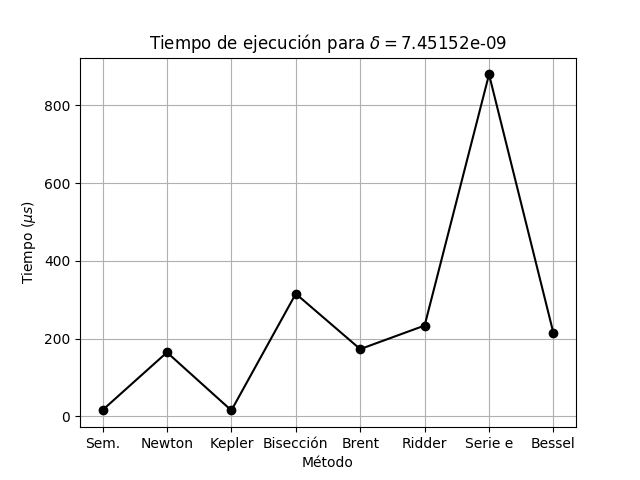

In [50]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
valores=[t_sem,t_new,t_kep,t_bis,t_bre,t_rid,t_ese,t_bes]
etiquetas=["","Sem.","Newton","Kepler","Bisección","Brent","Ridder","Serie e","Bessel"]
ax.plot(valores,'ko-');
ax.set_xticklabels(etiquetas);

#Decoración
ax.grid()
ax.set_xlabel("Método");
ax.set_ylabel("Tiempo ($\mu s$)");
ax.set_title(f"Tiempo de ejecución para $\delta=${delta:g}");

<a id='fig:07.04.02.00.Problema2Cuerpos.SolucionTiempo.AproximacionKepler_93'></a><center><b>Figura 7.93.</b> </center>

Observamos que para una precisión relativamente baja (aquella provista como referencia por la rutina `kepler_semianalitica`), el método de Kepler o el de punto fijo y el método de Newton, son en general los más rápidos entre los vistos en esta sección.  

Sin embargo si cambiamos el valor de los parámetros $M$ y $e$ o incrementamos la precisión (disminuímos el valor de la tolerancia $\delta$) los resultados varían de unos métodos a otros.  

El lector puede cambiar en el algoritmo [kepler_tiempos](#code:kepler_tiempos), el valor del parámetro `delta`, o de los parámetros de entrada $M$ y $e$ para ver el efecto que tiene en el tiempo de ejecución promedio de las rutinas.

**NOTAS AL PIE:**

<a id='notaspie_1'></a>
1. En este libro apareció también formulada por primera vez la ley armónica, que llamamos aquí tercer teorema del movimiento orbital o teorema armónico.  En los Epítome Kepler uso también por primera vez la palabra *inercia*, cuyo concepto sería elaborado en profundidad posteriormente por Galileo, Descartes y por supuesto por Newton.



[Indice](index.ipynb) | Previo: [Problema2Cuerpos.SolucionTiempo.EcuacionKepler](07.04.01.00.Problema2Cuerpos.SolucionTiempo.EcuacionKepler.ipynb) | Siguiente: [Problema2Cuerpos.SolucionTiempo.Sintesis](07.04.02.00.Problema2Cuerpos.SolucionTiempo.Sintesis.ipynb)